<a href="https://colab.research.google.com/github/Seblao/New_deposit/blob/main/ML_Quete_Titanic_re.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Machine Learning Approfondi : Prédiction des survivants du Titanic

## Introduction

Bienvenue dans ce challenge approfondi de machine learning ! Vous allez travailler sur l'un des problèmes les plus emblématiques du domaine : la prédiction des survivants du Titanic. Ce projet vous guidera à travers toutes les étapes essentielles d'un projet de machine learning, de l'exploration détaillée des données à la création, l'amélioration et l'interprétation d'un modèle de régression logistique.

## Contexte historique

Le RMS Titanic était un paquebot britannique qui a fait naufrage dans l'océan Atlantique Nord en avril 1912 après avoir heurté un iceberg lors de son voyage inaugural de Southampton à New York. Sur les 2224 passagers et membres d'équipage, plus de 1500 ont perdu la vie, faisant de cette tragédie l'un des naufrages les plus mortels de l'histoire maritime en temps de paix.

Ce désastre a conduit à d'importantes améliorations dans les réglementations de sécurité maritime et est devenu un sujet d'étude fascinant pour les data scientists, qui cherchent à comprendre quels facteurs ont influencé les chances de survie des passagers.

## Objectif du projet

Votre mission est de développer un modèle de machine learning capable de prédire si un passager a survécu ou non au naufrage du Titanic, en vous basant sur diverses caractéristiques telles que l'âge, le sexe, la classe de billet, etc. Ce faisant, vous découvrirez des insights précieux sur les facteurs qui ont influencé la survie lors de cette tragédie historique.

## Partie 1 : Préparation et exploration approfondie des données

### 1.1 Chargement et préparation initiale des données

**Objectif** : Charger le dataset et effectuer une première inspection des données.

**Instructions** :

1. Importez les bibliothèques nécessaires : pandas, numpy, matplotlib, seaborn.
2. Chargez les données du Titanic depuis le lien fourni avec pandas.
3. Convertissez la colonne 'Survived' en catégories plus lisibles : "Survécu" pour 1, "Décédé" pour 0.
4. Affichez les 10 premières lignes du DataFrame avec `head()`.
5. Utilisez la méthode `info()` pour obtenir un aperçu global du DataFrame, y compris les types de données et les valeurs non-nulles.

**Questions de réflexion** :
- Combien y a-t-il de passagers dans ce dataset ?
- Quels types de données (numériques, catégorielles) pouvez-vous identifier ?
- Y a-t-il des colonnes avec des valeurs manquantes ? Si oui, lesquelles ?



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df = pd.read_csv(link)
df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [ ]:
# Calcul du % global de survie :
survival_percentage = df['Survived'].mean() * 100
survival_percentage

38.55693348365276

In [ ]:
df_titanic = df
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,Dead,3,Mr. James Moran,male,27.0,0,0,8.4583
6,Dead,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,Dead,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,Survived,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,Survived,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    object 
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


In [ ]:
numerical_cols = df_titanic.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']

In [ ]:
df_titanic.shape

(887, 8)

In [ ]:
categorical_cols = df_titanic.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Survived', 'Name', 'Sex']

In [ ]:
df_titanic.isnull().sum().sort_values()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0


### 1.2 Analyse statistique descriptive

**Objectif** : Obtenir des statistiques descriptives pour mieux comprendre la distribution des données.

**Instructions** :

1. Utilisez la méthode `describe()` pour obtenir des statistiques descriptives des colonnes numériques.
2. Pour les colonnes catégorielles, utilisez `value_counts()` pour voir la distribution des catégories.
3. Calculez le pourcentage global de survie.

**Questions de réflexion** :
- Quelle est la moyenne d'âge des passagers ? Et la médiane ?
- Quelle est la répartition des passagers entre les différentes classes ?
- Y a-t-il une grande différence entre la moyenne et la médiane pour certaines variables ? Si oui, que cela pourrait-il indiquer ?


In [ ]:
df_titanic.describe()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.00000
mean,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.836662,14.121908,1.104669,0.807466,49.78204
min,1.000000,0.420000,0.000000,0.000000,0.00000
25%,2.000000,20.250000,0.000000,0.000000,7.92500
50%,3.000000,28.000000,0.000000,0.000000,14.45420
75%,3.000000,38.000000,1.000000,0.000000,31.13750
max,3.000000,80.000000,8.000000,6.000000,512.32920


In [ ]:
# Distribut° des ctégories pr la colonne 'Survived' :
print("Distribution des catégories pour la colonne 'Survived':")
print(df_titanic['Survived'].value_counts())
print("\n")

# Distribut° des ctégories pr la colonne 'Sex' :
print("Distribution des catégories pour la colonne 'Sex':")
print(df_titanic['Sex'].value_counts())
print("\n")

# Distribut° des ctégories pr la colonne 'Name' :
print("Distribution des catégories pour la colonne 'Name':")
print(df_titanic['Name'].value_counts())
print("\n")

Distribution des catégories pour la colonne 'Survived':
Survived
Dead        545
Survived    342
Name: count, dtype: int64


Distribution des catégories pour la colonne 'Sex':
Sex
male      573
female    314
Name: count, dtype: int64


Distribution des catégories pour la colonne 'Name':
Name
Mr. Owen Harris Braund            1
Sir. Cosmo Edmund Duff Gordon     1
Mr. Eliezer Gilinski              1
Mr. Joseph Murdlin                1
Mr. Matti Rintamaki               1
                                 ..
Mr. Bernard McCoy                 1
Mr. William Cahoone Jr Johnson    1
Miss. Nora A Keane                1
Mr. Howard Hugh Williams          1
Mr. Patrick Dooley                1
Name: count, Length: 887, dtype: int64




In [ ]:
# Moy. d'âge des passagers :
mean_age = df_titanic['Age'].mean()
mean_age

29.471443066516347

In [ ]:
# Médiane de l'âge des passagers :
median_age = df_titanic['Age'].median()
median_age

28.0

In [ ]:
# Répartit° des passagers entre les  classes :
class_distribution = df['Pclass'].value_counts()
class_distribution

,count
Pclass,
3,487
1,216
2,184


In [ ]:
mean_class = df_titanic['Pclass'].mean()
mean_class

2.305524239007892

In [ ]:
median_class = df_titanic['Pclass'].median()
median_class

3.0

In [ ]:
'Siblings/Spouses Aboard'

'Siblings/Spouses Aboard'

In [ ]:
mean_fare = df_titanic['Fare'].mean()
mean_fare

32.30542018038331

In [ ]:
median_fare = df_titanic['Fare'].median()
median_fare

14.4542

In [ ]:
mean_parent = df_titanic['Parents/Children Aboard'].mean()
mean_parent

0.3833145434047351

In [ ]:
median_parent = df_titanic['Parents/Children Aboard'].median()
median_parent

0.0

In [ ]:
mean_sister = df_titanic['Siblings/Spouses Aboard'].mean()
mean_sister

0.5253664036076663

In [ ]:
median_sister = df_titanic['Siblings/Spouses Aboard'].median()
median_sister

0.0

In [ ]:
# Lorsque l'on a des valeurs très différentes entre moy. et médiane ; cela signifie que l'on a des valeurs extrêmes où abbérantes qui influent sur la moy.

### 1.3 Visualisation approfondie des données

**Objectif** : Créer des visualisations pour mieux comprendre les relations entre les variables et leur impact sur la survie.

**Instructions** :

1. Créez un histogramme de la distribution des âges, avec une distinction entre survivants et non-survivants.
2. Réalisez un graphique en barres montrant le taux de survie par classe de passager.
3. Faites un graphique en violon pour comparer la distribution des tarifs (Fare) entre les survivants et les non-survivants.
4. Créez une heatmap de corrélation pour toutes les variables numériques.
5. Réalisez un graphique en barres empilées pour montrer la survie en fonction du sexe et de la classe.

**Questions de réflexion** :
- Y a-t-il une différence notable dans la distribution des âges entre les survivants et les non-survivants ?
- Quelle classe de passagers semble avoir eu le meilleur taux de survie ? Le pire ?
- Pouvez-vous identifier une corrélation entre le prix du billet et les chances de survie ?
- Quelles variables semblent être les plus corrélées avec la survie ?



In [ ]:
df['Survived'] = df['Survived'].astype(int)

<ipython-input-55-bfa958b139f7>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


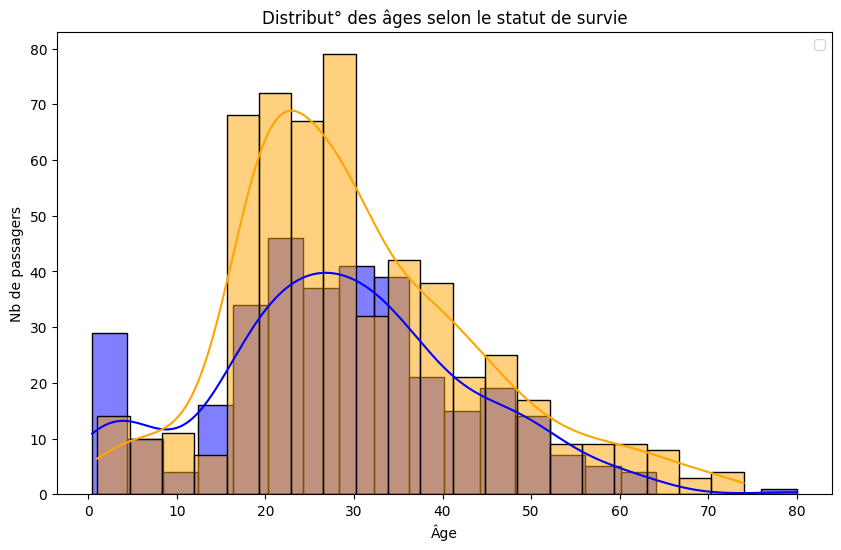

In [ ]:
plt.figure(figsize=(10,6))

# Histo pr les survivants (Survived == 1) :
sns.histplot(df[df['Survived'] == 1]['Age'], bins=20, color='blue', kde=True)

# Histo pr les non-survivants (Survived == 0) :
sns.histplot(df[df['Survived'] == 0]['Age'], bins=20, color='orange', kde=True)

plt.title('Distribut° des âges selon le statut de survie')
plt.xlabel('Âge')
plt.ylabel('Nb de passagers')
plt.legend()

plt.show()

<Figure size 1000x600 with 0 Axes>

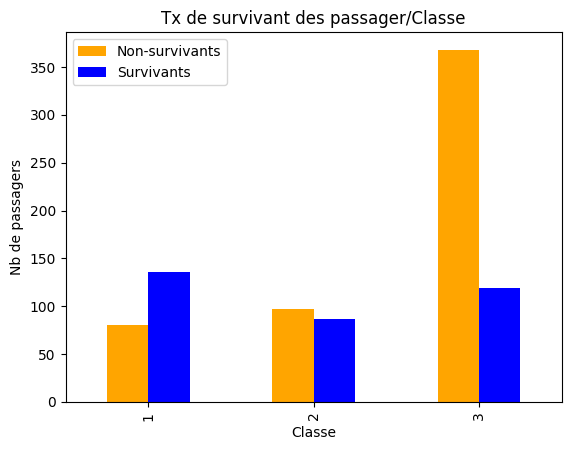

In [ ]:
# Cpte le nb de survivants et non-survivants par classe :
survival_counts = df.groupby("Pclass")["Survived"].value_counts().unstack()

plt.figure(figsize=(10,6))
survival_counts.plot(kind="bar", color=["orange", "blue"])

# Ajt des titres et labels :
plt.title("Tx de survivant des passager/Classe")
plt.xlabel("Classe")
plt.ylabel("Nb de passagers")
plt.legend(["Non-survivants", "Survivants"])

plt.show()

<ipython-input-30-694012cd95a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Survived"], y=df["Fare"], palette=["orange", "blue"])


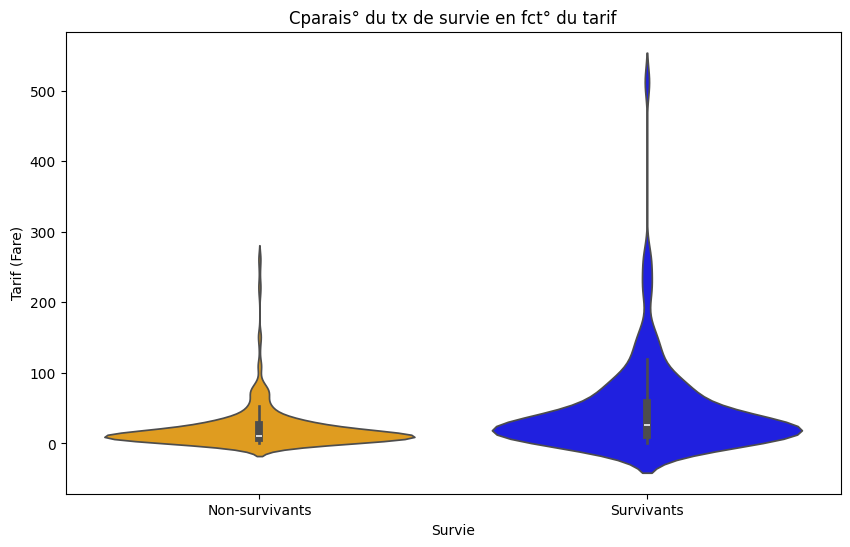

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df["Survived"], y=df["Fare"], palette=["orange", "blue"])

# Ajt les titres et labels :
plt.title("Cparais° du tx de survie en fct° du tarif")
plt.xlabel("Survie")
plt.ylabel("Tarif (Fare)")
plt.xticks([0, 1], ["Non-survivants", "Survivants"])

plt.show()

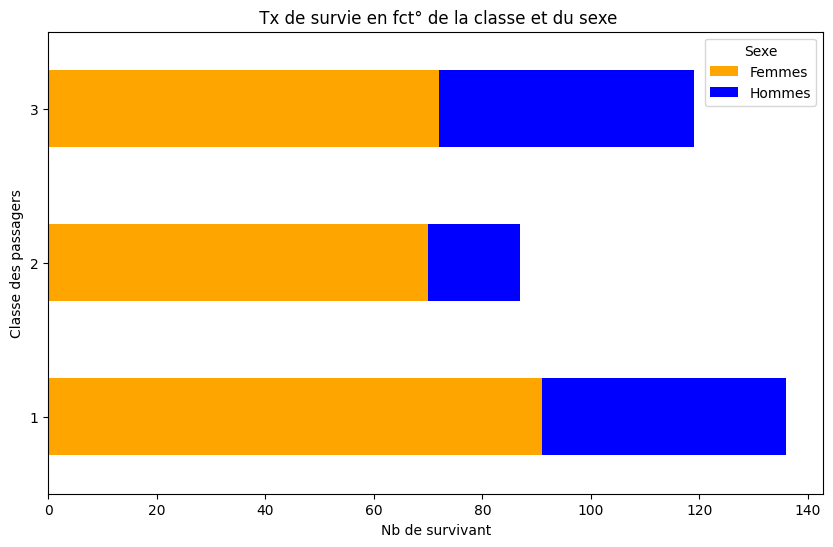

In [ ]:
# Créat° du tablx croisé des survivants par sexe et classe :
survival_sex_class = df.pivot_table(index="Pclass", columns="Sex", values="Survived", aggfunc="sum")

survival_sex_class.plot(kind="barh", stacked=True, color=["orange", "blue"], figsize=(10, 6))

# Ajt des titres et labels :
plt.title(" Tx de survie en fct° de la classe et du sexe")
plt.xlabel("Nb de survivant")
plt.ylabel("Classe des passagers")
plt.legend(["Femmes", "Hommes"], title="Sexe")
plt.xticks(rotation=0)

plt.show()

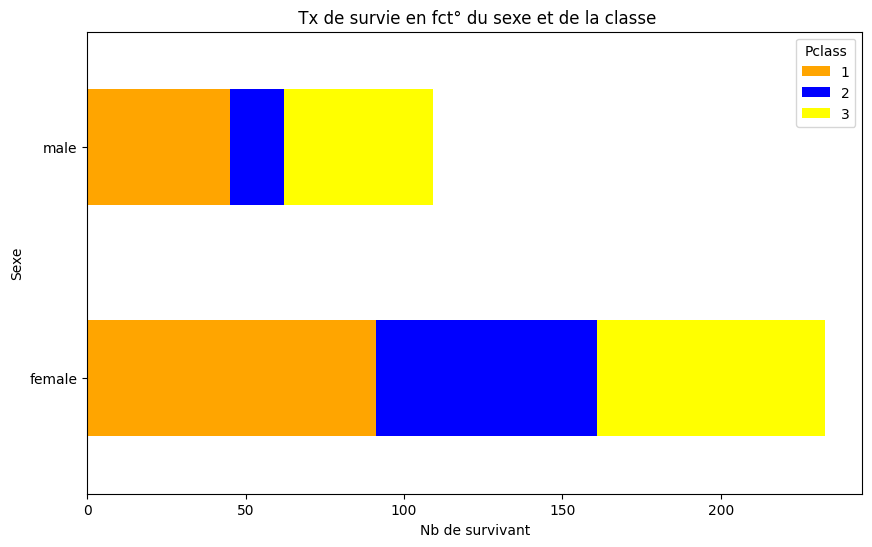

In [ ]:
# Créat° du tablx croisé des survivants par sexe et classe :
survival_sex_class = df.pivot_table(index="Sex", columns="Pclass", values="Survived", aggfunc="sum")

survival_sex_class.plot(kind="barh", stacked=True, color=["orange", "blue", "yellow"], figsize=(10, 6))

# Ajt des titres et labels :
plt.title(" Tx de survie en fct° du sexe et de la classe")
plt.xlabel("Nb de survivant")
plt.ylabel("Sexe")
plt.legend(["1", "2", "3"], title="Pclass")
plt.xticks(rotation=0)

plt.show()

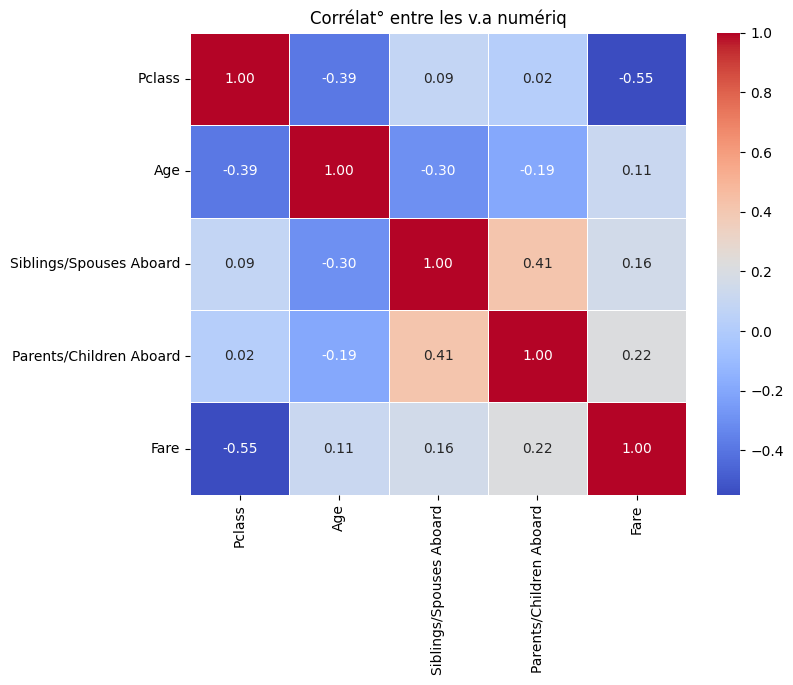

In [ ]:
# Sélect° des colonnes numériq :
numerical_cols = ['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']

# Calcul de la matrice de corrélat° :
correlation_matrix = df[numerical_cols].corr()

# Créat° de la heatmap :
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Corrélat° entre les v.a numériq")
plt.show()

In [ ]:
#La distribut° des âges entre survivants et non survivants est la même.
# Le meilleur taux de survie semble se situer sur la 1ère classe.
# Il semble qu'un prix de billet faible montre un très haut taux de survie.
# Le taux de survie le plus corrélé est fonction du sexe. Ce sont chez les femmes que le taux est le plus élevé.
# Cpdt, les hommes st presque 2 fois plus nombreux ; donc il est normal également que le taux de mortalité soit 2 fois plus important.
# On voit également que selon la mâtrice de corrélation, il se dégage que le lien de parenté est également lié : enfant, soeur, frère, conjoint sont dependants.

### 1.4 Analyse des valeurs manquantes

**Objectif** : Identifier et traiter les valeurs manquantes dans le dataset.

**Instructions** :

1. Utilisez la méthode `isnull().sum()` pour compter les valeurs manquantes dans chaque colonne.
2. Créez un graphique montrant le pourcentage de valeurs manquantes pour chaque colonne.
3. Pour la colonne 'Age', analysez si les valeurs manquantes sont distribuées aléatoirement ou s'il y a un biais.
4. Proposez et implémentez une stratégie pour gérer ces valeurs manquantes (par exemple, imputation par la moyenne, la médiane, ou une méthode plus avancée).

**Questions de réflexion** :
- Quelles colonnes ont le plus de valeurs manquantes ?
- Pourquoi certaines colonnes pourraient-elles avoir plus de valeurs manquantes que d'autres ?
- Quelle stratégie d'imputation vous semble la plus appropriée pour chaque colonne avec des valeurs manquantes ? Pourquoi ?



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    object 
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0


In [ ]:
df.isna().any()

,0
Survived,False
Pclass,False
Name,False
Sex,False
Age,False
Siblings/Spouses Aboard,False
Parents/Children Aboard,False
Fare,False


In [ ]:
df.isna().any().sum()

0

In [ ]:
df[df.isna().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare


In [ ]:
# Il n'y a aucune valeur manquante car le nombre de valeurs non null est exactement le même dans chaque colonne.

## Partie 2 : Préparation du modèle de régression logistique

### 2.1 Sélection et préparation des features

**Objectif** : Préparer les données pour l'entraînement du modèle.

**Instructions** :

1. Sélectionnez les features pertinentes pour votre modèle, en incluant celles que vous avez créées.
2. Utilisez `pd.get_dummies()` pour encoder les variables catégorielles.
3. Divisez les données en features (X) et target (y).
4. Normalisez les features numériques en utilisant `StandardScaler` de sklearn.

**Questions de réflexion** :
- Pourquoi est-il important d'encoder les variables catégorielles ?
- Quels sont les avantages de la normalisation des features numériques ?
- Y a-t-il des features que vous avez décidé de ne pas inclure ? Pourquoi ?



In [ ]:
# Sélect° des features (caractéristiq) et de la target (cible) :
features = ["Pclass", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare", "Sex", "Name"]
target = "Survived"

# Déterminat° des v.a X et y :
X = df[features]
y = df[target]

# Encodage des v.a ctégorielles avec pd.get_dummies pr trfrmer les v.a en 0 ou 1 :
X = pd.get_dummies(X, columns=["Sex", "Name"], drop_first=True)

# Nrmalisat° des features numériq avec StandardScaler pr trfrmer les vleurs afin d'avoir 1 moy. de 0 et écart-type de 1 :
scaler = StandardScaler()
numeric_features = ["Pclass", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare"]
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Split des données en train/test (80 % train, 20 % test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape
X_test.shape

(178, 892)

In [ ]:
# Il est important d'encoder les v.a catégorielles car les modèles de ML ne peuvent traiter que des valeurs numériq.
# La normalisat° des features permet d'avoir la même échelle entre les v.a (moy. de 0 et ecart-type de 1) afin d'éviter q les modèle de régress° soit sensibles aux échelles des v.a (meilleur convergence de l'algorithme). Prmet 1 interprétat° équitable entre les features.
#Il y a des features qui ne sont pas inclus car la colonne 'Survived' est la cible et 'Sex' et 'Name' sont des v.a catégorielles.

### 2.2 Division des données

**Objectif** : Diviser les données en ensembles d'entraînement et de test.

**Instructions** :

1. Importez `train_test_split` de sklearn.
2. Divisez vos données en ensembles d'entraînement et de test (80% train, 20% test).
3. Utilisez `random_state=36` pour la reproductibilité.
4. Vérifiez que la proportion de survivants est similaire dans les deux ensembles.

**Questions de réflexion** :
- Pourquoi est-il important de diviser les données en ensembles d'entraînement et de test ?
- Que se passerait-il si la proportion de survivants était très différente entre les deux ensembles ?



In [ ]:
# Sélect° des features et de la target :
X = df.drop(columns=['Survived'])
y = df['Survived']

# Divis° des données en ensbles d'entraînemt et de test (80 % train, 20 % test) :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

# Vérificat° de la proport° de survivants ds les 2 ensbles :
print("Proport° de survivants ds l'ensble d'entraînemt :")
print(y_train.value_counts(normalize=True))

print("\nProport° de survivants ds l'ensble de test :")
print(y_test.value_counts(normalize=True))


Proport° de survivants ds l'ensble d'entraînemt :
Survived
0    0.624824
1    0.375176
Name: proportion, dtype: float64

Proport° de survivants ds l'ensble de test :
Survived
0    0.573034
1    0.426966
Name: proportion, dtype: float64


In [ ]:
# La proport° des survivants ds les 2 ensbles est relativement similaire.
# Il est important de diviser les données en ensble d'entrainement et de test pour éviter d'une part le sur apprentissage afin de généraliser les tendances et non de mémoriser les données ; d'évaluer la performance du modèle sur des données réelles ; la division des données permet de calculer l'erreur du test et reflète ainsi la vraie performance du modèle ; séparat° des données permet de comparer les modèles entre-eux.
# Si la proport° des survivants était très dfifférentes entre les 2 ensbles, cela signifierait que le modèle est biaisé (apprendre 1 catégorie de manière disproportionnée par rapport aux autres) et qu'il y a 1 pb d'évaluat° de la performance.

### 2.3 Entraînement du modèle initial

**Objectif** : Entraîner un premier modèle de régression logistique et évaluer ses performances.

**Instructions** :

1. Importez `LogisticRegression` de sklearn.
2. Instanciez un modèle de régression logistique avec `random_state=36`.
3. Entraînez le modèle sur les données d'entraînement.
4. Faites des prédictions sur les ensembles d'entraînement et de test.
5. Calculez et affichez la précision (accuracy) sur les deux ensembles.
6. Affichez la matrice de confusion et le rapport de classification pour l'ensemble de test.
7. Affichez les coefficients du modèle et interprétez-les.

**Questions de réflexion** :
- Comment interprétez-vous la différence de précision entre l'ensemble d'entraînement et l'ensemble de test ?
- Quelles features semblent avoir le plus d'impact sur la prédiction selon les coefficients du modèle ?
- Y a-t-il des signes de surapprentissage (overfitting) ou de sous-apprentissage (underfitting) ?



In [ ]:
# Pb avec les colonnes pr la régress° logitiq. Nécéssité de supprimer la colonne 'Name'

In [ ]:
# Suppress° des colonnes non pertinentes :
df_cleaned = df.drop(columns=['Name'])

# Encodage des v.a ctégorielles :
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Séparat° des features (X) et de la cible (y) :
X = df_encoded.drop(columns=['Survived'])
y = df_encoded['Survived']

# Nrmalisat° des données numériq :
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divis° des données en train et test (80 % train, 20% test) :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=36)

In [ ]:
# Créat° du Mdèle de régress° logistiq :
logreg = LogisticRegression(random_state=36)

# Entraînemt du mdèle sur les données d'entraînemt :
logreg.fit(X_train, y_train)

# Prédict° sur les ensbles d'entraînemt et de test :
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Calcul de la précis° sur les ensbles d'entraînemt et de test :
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Affichage de la précis° :
print(f"Précis° sur l'ensble d'entraînemt : {train_accuracy:.4f}")
print(f"Précis° sur l'ensble de test : {test_accuracy:.4f}")

Précis° sur l'ensble d'entraînemt : 0.8110
Précis° sur l'ensble de test : 0.7809


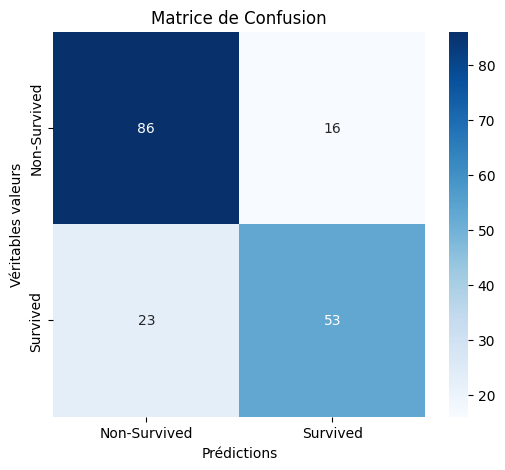

In [ ]:
# Matrice de cfus° pr l'ensble de test afin d'idtifier les faux positifs, faux négatifs, vrais positifs et vrais négatifs (pr visualiser les erreurs du mdèle) :
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Survived', 'Survived'], yticklabels=['Non-Survived', 'Survived'])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Véritables valeurs")
plt.show()

In [ ]:
# Rapport de classificat° pr l'ensble de test (avec plsrs métriq : précis°, rappel, F1-score pr chaq classe, moy. globale) :
class_report = classification_report(y_test, y_test_pred)
print("Rapport de Classification :\n", class_report)

Rapport de Classification :
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       102
           1       0.77      0.70      0.73        76

    accuracy                           0.78       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [ ]:
# Coeff. du mdèle (indiq l'impact de chaq feature ds le modèle de régress° logistiq) :
coefficients = logreg.coef_[0]
features = X.columns

# Affichage des coeffs pr chaq feature :
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
print("Coefficients du modèle :")
coef_df

Coefficients du modèle :


,Feature,Coefficient
0,Pclass,-1.068219
1,Age,-0.747343
2,Siblings/Spouses Aboard,-0.439566
3,Parents/Children Aboard,-0.070787
4,Fare,0.070668
5,Sex_male,-1.324326


In [ ]:
# Interprétat° des coeff. du mdèle :
# Pr le coeff. positif (Fare), l'augmentat° de cette v.a augmente la probabilité que l'événemt "survivant" se produise,
# Pr la majorité des coeff. qui st négatifs, l'augmentat° de ces v.a diminue la probabilité de survie.

In [ ]:
# Ici, la différence de précis° entre l'ensble d'entrainemt et l'ensble de test est très faible.
# Les features qui semblent avoir le + d'impact sur la prédict° des coeffs du mdèle st le sexe, pclass et l'âge.
# Ici, il n'y a pas de signes de surapprentissage ou de ss-apprentissage du mdèle car il n'y pas bcp de différences entre la précis° de l'ensble d'entrainemt et celui du test.

## Partie 3 : Amélioration et interprétation du modèle

### 3.1 Ajustement des hyperparamètres

**Objectif** : Optimiser les hyperparamètres du modèle pour améliorer ses performances.

**Instructions** :

1. Importez `GridSearchCV` de sklearn.
2. Définissez une grille de recherche pour les hyperparamètres C et penalty.
3. Utilisez la validation croisée (avec GridSearchCV) pour trouver les meilleurs hyperparamètres.
4. Réentraînez le modèle avec les meilleurs hyperparamètres.
5. Comparez les performances de ce nouveau modèle avec le modèle initial.

**Questions de réflexion** :
- Quels hyperparamètres ont donné les meilleures performances ? Pourquoi pensez-vous que c'est le cas ?
- Comment la validation croisée aide-t-elle à prévenir le surapprentissage ?



In [ ]:
# Définis les hyperparamètres à tester :
# Regularisat° force : C
# Type de régularisat° : penalty
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Créer le mdèle de régress° logistiq :
logreg = LogisticRegression(solver='liblinear', random_state=36)

# Appliq GridSearchCV :
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Exécute la rchrche sur les données d'entraînemt :
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trvés :
print("Meilleurs hyperparamètres trvés :")
print(grid_search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Meilleurs hyperparamètres trvés :
{'C': 10, 'penalty': 'l1'}


In [ ]:
# Réentraîne le mdèle avec les meilleurs hyperparamètres :
best_logreg = grid_search.best_estimator_

# 8. Évalue la précis° du mdèle optimisé :
train_accuracy_optimized = best_logreg.score(X_train, y_train)
test_accuracy_optimized = best_logreg.score(X_test, y_test)

print(f"Précis° sur l'ensble d'entraînemt (optimisé) : {train_accuracy_optimized:.4f}")
print(f"Précis° sur l'ensble de test (optimisé) : {test_accuracy_optimized:.4f}")

# 9. Cpare avec le mdèle initial :
print(f"Précision sur l'ensemble d'entraînement (initial) : {logreg.score(X_train, y_train):.4f}")
print(f"Précision sur l'ensemble de test (initial) : {logreg.score(X_test, y_test):.4f}")

Précis° sur l'ensble d'entraînemt (optimisé) : 0.8152
Précis° sur l'ensble de test (optimisé) : 0.7809
Précision sur l'ensemble d'entraînement (initial) : 0.8110
Précision sur l'ensemble de test (initial) : 0.7809


In [ ]:
# Les performances de ce nveau mdèle avec le mdèle initial de logistiq est quasimet identiq.
# Les hyperparamètres qui ont donné les meilleurs résultats sont un C de 10 et penalty l1. Un C de 10 signifie une régularisat° faible et donc aà ce que le mdèle s'adapte mieux aux données d'entrainemt. L1 crrspd à la régularisat° lasso ; ie qui aide à sélectionner les caractéristiq les + imprtantes en imposant des coeff nuls pr les caractéristiq moins significtaives ; ce qui conduit à 1 modèle + sple et interprétable.
# Ces hyperparamètres permette au mdèle d'ê suffisamt flexible pr s'ajuter aux données tt en étant capable de se généraliser efficacemt et d'éviter le surapprentissage grâce à la regularisat° L1.
# La validat° croisée (folds) évalue la performce du mdèle de manière + robuste en utilisant plsrs ss-ensbles de données d'entrainemt. Elle aide à prévenir du surapprentissage en garantissant q le mdèle ne s'adapte pas trop aux données spé. de l'ensble d'entrainemt.

### 3.2 Analyse des erreurs

**Objectif** : Comprendre les cas où le modèle se trompe.

**Instructions** :

1. Identifiez les instances mal classées par le modèle dans l'ensemble de test.
2. Analysez les caractéristiques de ces instances mal classées.
3. Créez des visualisations pour comparer les prédictions correctes et incorrectes.

**Questions de réflexion** :
- Y a-t-il des patterns communs parmi les instances mal classées ?
- Quelles améliorations pourriez-vous suggérer pour réduire ces erreurs ?



### 3.3 Comparaison avec d'autres modèles

**Objectif** : Comparer les performances de la régression logistique avec d'autres algorithmes.

**Instructions** :

1. Implémentez au moins deux autres modèles (par exemple, Random Forest et SVM).
2. Comparez les performances de ces modèles avec votre modèle de régression logistique optimisé.
3. Discutez des avantages et des inconvénients de chaque approche.

**Questions de réflexion** :
- Quel modèle a donné les meilleures performances ? Pourquoi pensez-vous que c'est le cas ?
- Quels sont les compromis entre la performance et l'interprétabilité pour chaque modèle ?
- Dans un scénario réel, quel modèle recommanderiez-vous d'utiliser et pourquoi ?



In [ ]:
# Prédict° avec le mdèle de régress° logistiq optimisé :
logreg = LogisticRegression(C=10, penalty='l1', solver='liblinear', random_state=36)
logreg.fit(X_train, y_train)

# Prédict° :
logreg_train_pred = logreg.predict(X_train)
logreg_test_pred = logreg.predict(X_test)

# Précis° sur l'ensble d'entraînemt et de test :
logreg_train_acc = accuracy_score(y_train, logreg_train_pred)
logreg_test_acc = accuracy_score(y_test, logreg_test_pred)

print(f"Précis° sur l'ensble d'entraînemt (Logreg) : {logreg_train_acc:.4f}")
print(f"Précis° sur l'ensble de test (Logreg) : {logreg_test_acc:.4f}")

Précis° sur l'ensble d'entraînemt (Logreg) : 0.8152
Précis° sur l'ensble de test (Logreg) : 0.7809


In [ ]:
# Nvx mdèle : Random Forest :
rf = RandomForestClassifier(random_state=36)
rf.fit(X_train, y_train)

# Prédict° :
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

# Précis° sur l'ensble d'entraînemt et de test :
rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)

print(f"Précis° sur l'ensble d'entraînemt (Random Forest) : {rf_train_acc:.4f}")
print(f"Précis° sur l'ensble de test (Random Forest) : {rf_test_acc:.4f}")


Précis° sur l'ensble d'entraînemt (Random Forest) : 0.9845
Précis° sur l'ensble de test (Random Forest) : 0.7921


In [ ]:
# Nvx mdèle : SVM :
svm = SVC(random_state=36)
svm.fit(X_train, y_train)

# Prédict° :
svm_train_pred = svm.predict(X_train)
svm_test_pred = svm.predict(X_test)

# Précis° sur l'ensble d'entraînemt et de test :
svm_train_acc = accuracy_score(y_train, svm_train_pred)
svm_test_acc = accuracy_score(y_test, svm_test_pred)

print(f"Précis° sur l'ensble d'entraînemt (SVM) : {svm_train_acc:.4f}")
print(f"Précis° sur l'ensble de test (SVM) : {svm_test_acc:.4f}")


Précis° sur l'ensble d'entraînemt (SVM) : 0.8463
Précis° sur l'ensble de test (SVM) : 0.8034


In [ ]:
# Résumé des résultats :
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Entrainemt Accuracy': [logreg_train_acc, rf_train_acc, svm_train_acc],
    'Test Accuracy': [logreg_test_acc, rf_test_acc, svm_test_acc]
})

results

,Model,Entrainemt Accuracy,Test Accuracy
0,Logistic Regression,0.815233,0.780899
1,Random Forest,0.984485,0.792135
2,SVM,0.846262,0.803371


## Régress° Logistiq :
### Avtges :
- Facile à cprdre et à implémenter,
- Efficace pr les pb linéaires,
- Interprétable grâce aux coeffs.

### Inconvénts :
- Ne performe pas bien avec des relat° non linéaires cplexes,
- Moins robuste aux outliers.

## Random Forest :
### Avtges :
- Très puissant pr des relat° non linéaires,
- Moins sensible au surapprentissage (overfitting) grâce à l'agrégat° des arbres,
- Peut traiter des interact° cplexes entre les v.a.

### Inconvénts :
- Moins interprétable (boîte noire).
- Entraînemt plus lg, surtt avec 1 grd nb d'arbres.

## SVM (Support Vector Machine) :
### Avtges :
- Très efficace ds des espaces de grde dimens°,
- Fctionne bien même avec des mrges de séparat° non linéaires grâce au noyau (kernel).

### Inconvénts :
- Sensible au choix du noyau et des paramètres,
- Pt-ê lent à entraîner, surtt avec 1 grd nb de données.

In [ ]:
# Le mdèle qui a donné les meilleures performances est le SVM car il a 1 bonne précis° d'entrainemt et 1 excellente précis°. Ce qui indiq 1 bonne balance entre adaptat° aux données d'entrainemt et généralisat°.
# Pr le mdèle Random Forest, ce dernier à 1 précision d'entrainemt extrêmemt élevé ; ce qui indiq surement 1 surapprentissage.

In [ ]:
# Lorsq l'on choisit 1 mdèle, il est svt nécessaire de faire 1 cpromis entre performance du mdèle et interprétabilité
# Le mdèle que je recommanderai d'utiliser dépendera des priorités et contraintes :
# Modèle	              Performance	Interprétabilité	Complexité	Temps de calcul
# Régression Logistique	Bonne (78%)	    Très élevée	    Faible	  Rapide
# Random Forest	        Meilleure (79%) Moyenne	        Moyenne	  Plus long
# SVM	                  Meilleure (80%)	Faible	        Élevée	  Très long
#

### Recommandation selon le contexte :

Si l'interprétabilité est clé (ex. domaine médical, finance) :
- Régress° Logistiq : Facile à expliq, chaq coeff. indiq l'impact d'1 v.a sur la prédict°,

Si l'objectif est d'obtenir la meilleure performance sans contrainte de tps :
- SVM : Il offre la meilleure précis°, mais pt-ê coûteux en calcul et difficile à interpréter,

Si on vt un bon compromis entre performance et interprétabilité :
- Random Forest : Bonne précis°, gest° des non-linéarités et interact°, mais moins interprétable qu'1 régress° logistiq.

### Conclus° :

Pr 1 premier mdèle robuste et explicable : Régress° Logistiq est idéale.
Si on cherche à maximiser la performance, on pt tester Random Forest ou SVM avec 1 ajustemt d'hyperparamètres.

Ds 1 scénario réel, il pt-ê intéressant de combiner plsrs mdèles pr optimiser précis° et interprétabilité.

## Conclusion et réflexions finales

1. Résumez les principales découvertes de votre analyse.
2. Quels facteurs semblent avoir le plus influencé la survie sur le Titanic ?
3. Quelles sont les limites de votre analyse et comment pourriez-vous l'améliorer ?
4. Si vous deviez conseiller quelqu'un pour augmenter ses chances de survie sur le Titanic, que lui diriez-vous basé sur votre analyse ?
5. Comment les techniques que vous avez apprises dans ce projet pourraient-elles être appliquées à d'autres problèmes de la vie réelle ?



In [ ]:
# Prcipales découvertes de l'analyse : découverte de l'utilisat° de différents mdèles de ML pr l'optimisat° de la prédict°
# Tx de survie dépend de plusieurs paramètres comme le sexe et également le prix du billet mais aussi : de la pclass et de l'âge.
# Les limites de notre analyse repose sur l'interprétrat° de mdèle qui en fct° de certains montrent un surapprentissage vis-à-vis des données comme le Random Forest. Il faut donc faire attention aux conclus° des analyses qui en découle.
# Si on devait conseiller quelq' pour augmenter ses chances de taux de survie serait : d'être  femme, de choisir plutôt la première classe, d'acheter des billets à moins de 200 $ et d'être âgé entre 15 et 35 ans.
# Les techniq apprises ds ce projet peuvent-être appliquées à d'autres pb de la vie réelle comme dans le milieu médical, le secteur bancaire...